In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 99

### Loading Dataset

In [86]:
df = pd.read_csv("C:/Users/yashu/Downloads/Telegram Desktop/25_Projects/ML/Turkiye Student Evaluation Analysis - Clustering/turkiye-student-evaluation_generic.csv")
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [88]:
df.shape

(5820, 33)

In [90]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [94]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

### Preprocessing the Dataset

In [97]:
#check for null values
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

### Exploratory Data Analysis

In [100]:
# set new style for the graph
#plt.style.use('fivethirtyeight')

In [102]:
df.head(1)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


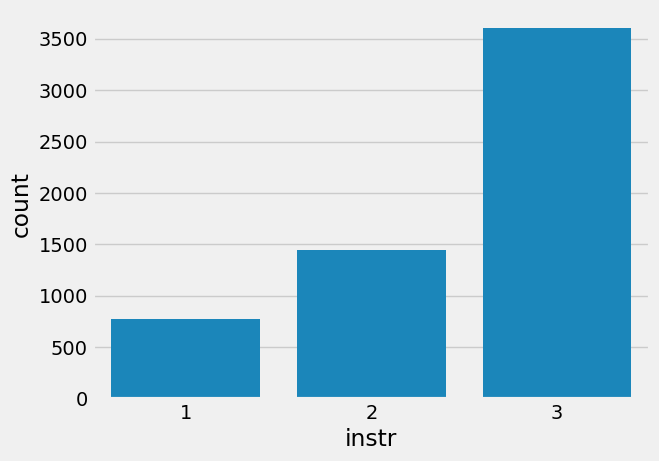

In [104]:
sns.countplot(x='instr', data=df)
plt.show()

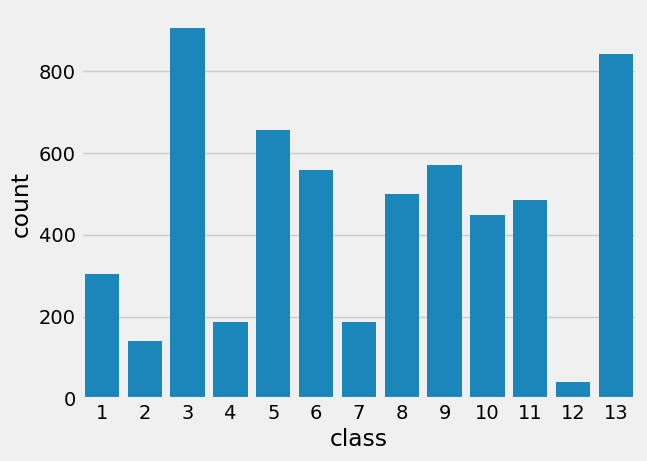

In [106]:
sns.countplot(x=df['class'])
plt.show()

In [148]:
# find the mean of questions
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [150]:
#extration question columns from the whole table data
x_questions = df.iloc[: , 5:33]
x_questions.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [152]:
#finding the mean of each column
q_mean = x_questions.mean(axis=0)
q_mean

Q1     2.929897
Q2     3.073883
Q3     3.178694
Q4     3.082474
Q5     3.105842
Q6     3.107388
Q7     3.066323
Q8     3.041924
Q9     3.165979
Q10    3.090722
Q11    3.183849
Q12    3.035567
Q13    3.242784
Q14    3.290893
Q15    3.287285
Q16    3.169588
Q17    3.398454
Q18    3.222509
Q19    3.261684
Q20    3.285395
Q21    3.307388
Q22    3.317526
Q23    3.201890
Q24    3.166838
Q25    3.312543
Q26    3.222165
Q27    3.154811
Q28    3.308076
dtype: float64

In [154]:
#finding the mean of all columns together
total_mean = q_mean.mean()
print(total_mean)

3.1861561119293076


In [156]:
#Converting the Mean to a DataFrame
q_mean = q_mean.to_frame('mean')
q_mean

,mean
Q1,2.929897
Q2,3.073883
Q3,3.178694
Q4,3.082474
Q5,3.105842
Q6,3.107388
Q7,3.066323
Q8,3.041924
Q9,3.165979
Q10,3.090722


In [159]:
#Resetting the Index of the DataFrame
q_mean.reset_index(level=0 , inplace=True)
q_mean

,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842
5,Q6,3.107388
6,Q7,3.066323
7,Q8,3.041924
8,Q9,3.165979
9,Q10,3.090722


In [161]:
q_mean.head()

,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842


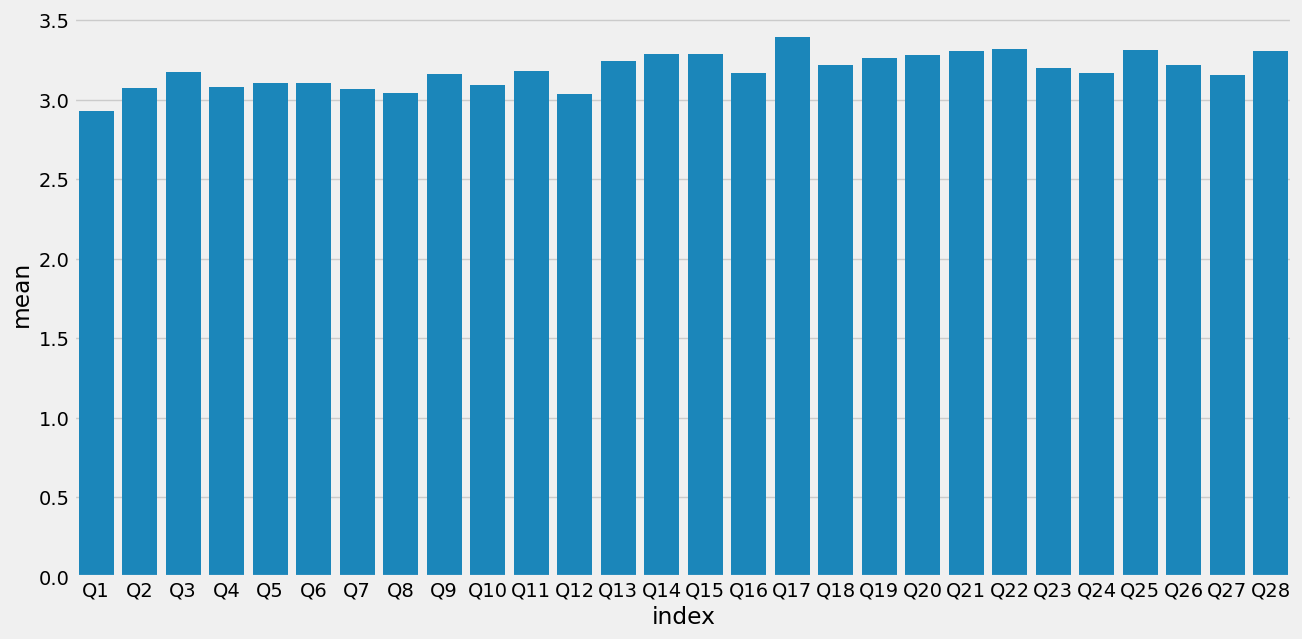

In [171]:
plt.figure(figsize=(14,7))
sns.barplot(x='index' , y='mean' , data=q_mean)
plt.show()

### Coorelation Matrix

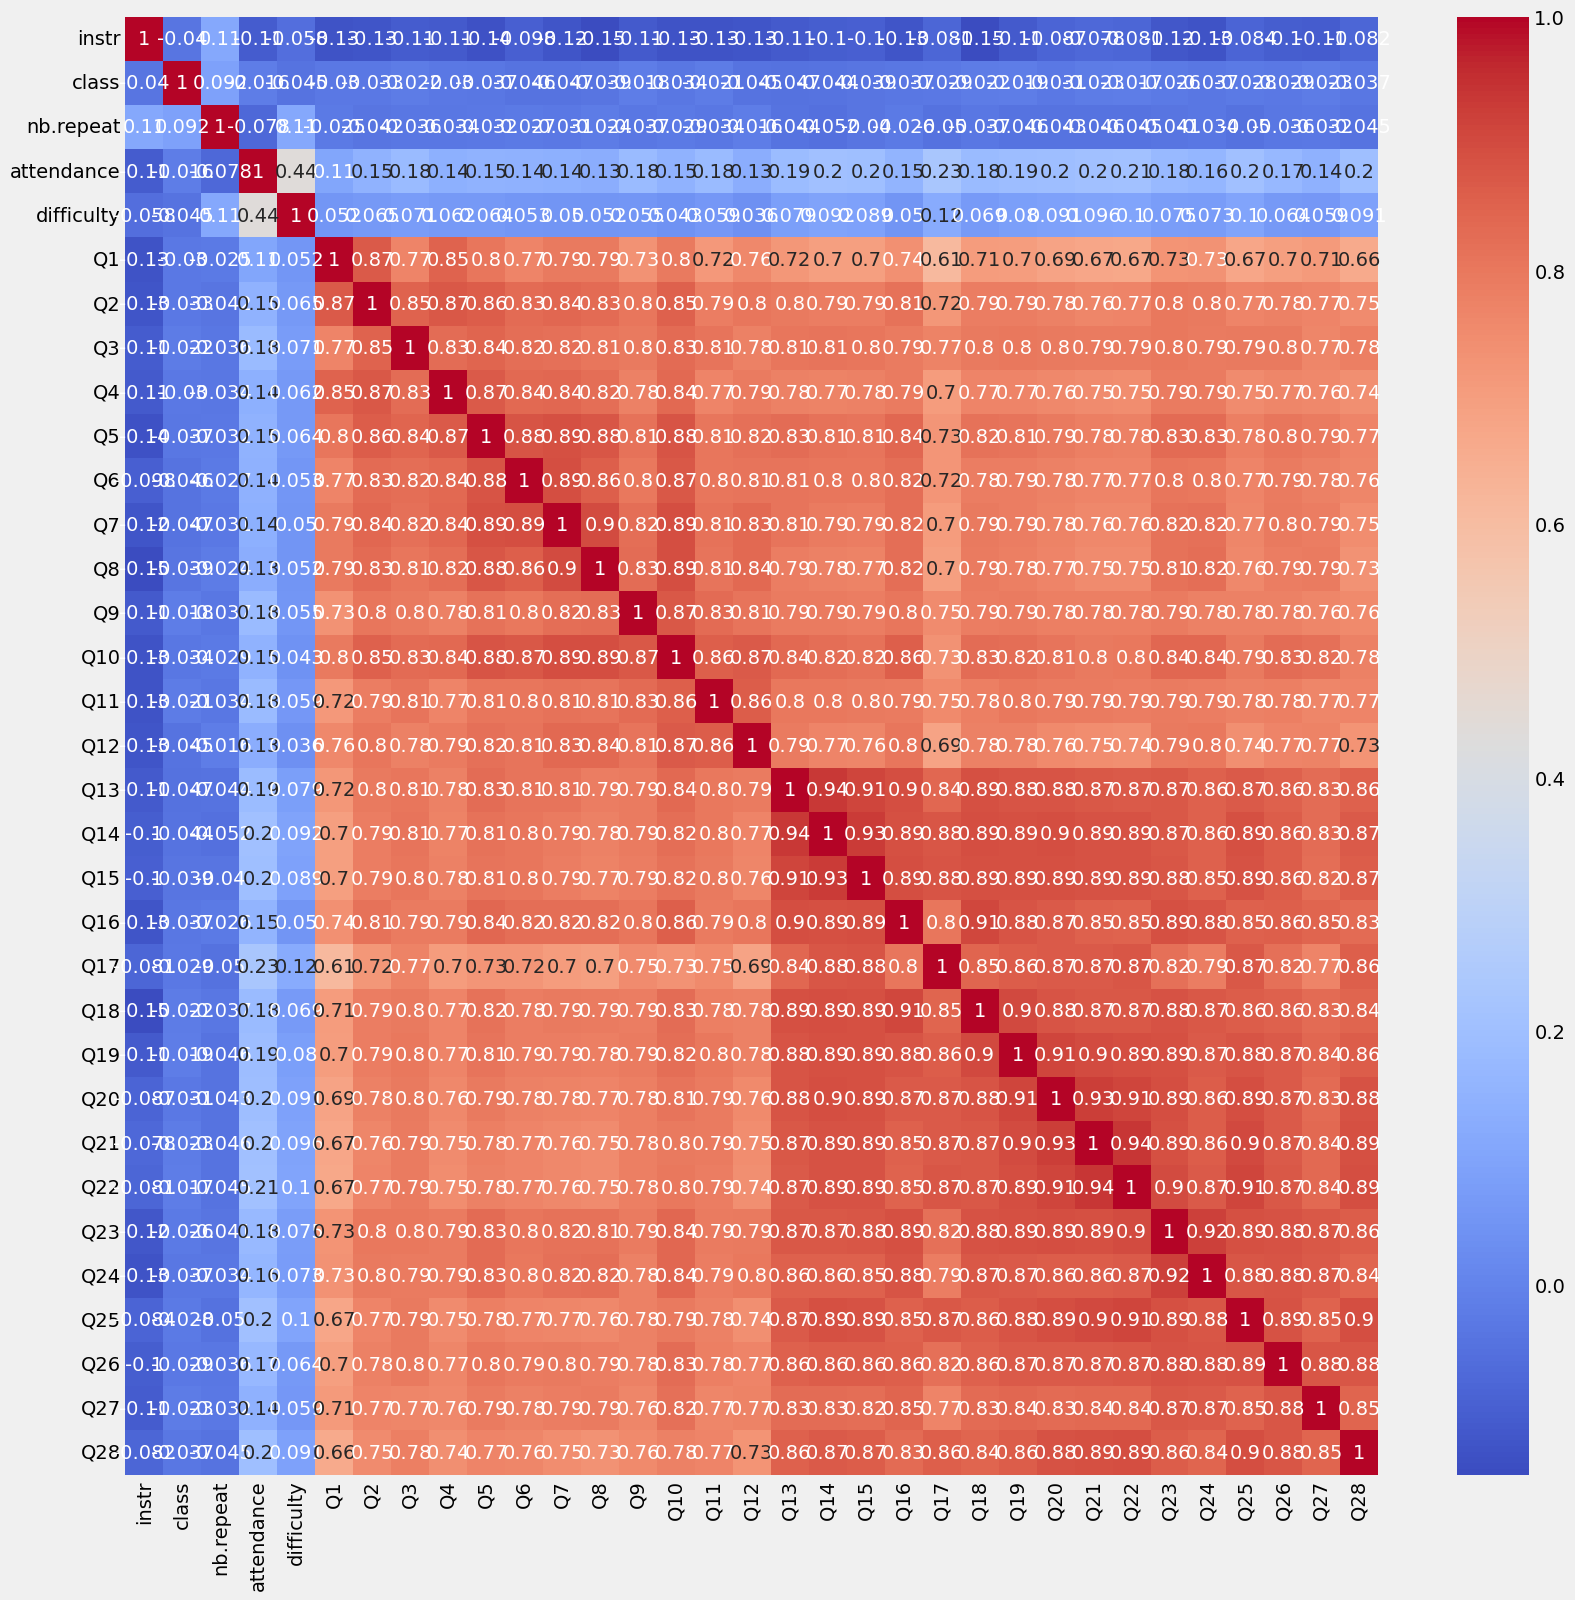

In [174]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr , annot = True , cmap='coolwarm' , cbar=True)
plt.show()

### Principal Component Analysis

In [178]:
X = df.iloc[: , 5:33]
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [180]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state=42)
X_pca = pca.fit_transform(X)

In [188]:
X_pca

array([[ -0.98901533,   0.52279815],
       [ -0.98901533,   0.52279815],
       [  9.59128851,   0.6408021 ],
       ...,
       [  9.59128851,   0.6408021 ],
       [-11.56931918,   0.4047942 ],
       [-11.56931918,   0.4047942 ]])

In [190]:
pca.explained_variance_ratio_

array([0.82198145, 0.04515671])

In [194]:
pca.explained_variance_ratio_.cumsum()

array([0.82198145, 0.86713817])

In [196]:
pca.explained_variance_ratio_.cumsum()[1]

0.8671381678891081

### Model Training

In [205]:
from sklearn.cluster import KMeans
distortions = []
cluster_range = range(1,6)
for i in cluster_range:
    model = KMeans(n_clusters = i , init = "k-means++" , random_state=42)
    model.fit(X_pca)
    distortions.append(model.inertia_)
print(distortions)

[230632.87797073612, 89734.89279713502, 38763.39098808728, 25179.060911873836, 21688.614469237848]


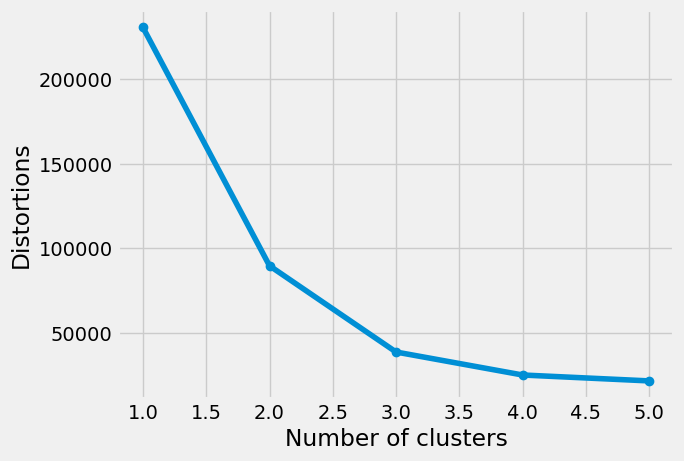

In [207]:
#ploting the inertia values for corresponding clusters
plt.plot(cluster_range , distortions , marker="o")
plt.xlabel("Number of clusters")
plt.ylabel('Distortions')
plt.show()

In [253]:
#user best cluster : from above "elbow point" graph, 3.0 is the best cluster point
model1 = KMeans(n_clusters=3 ,init="k-means++" ,  random_state=45)
model1.fit(X_pca)
y = model.predict(X_pca)

In [255]:
model1.cluster_centers_

array([[-0.90723878, -0.36328933],
       [ 6.10536499,  0.21115292],
       [-9.30668034,  0.31710928]])

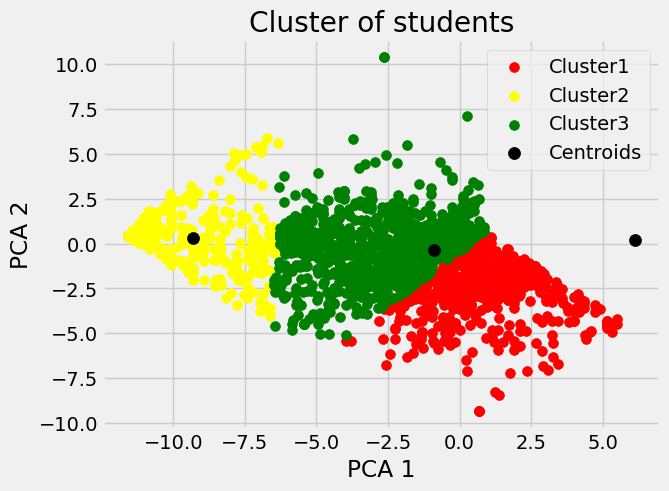

In [257]:
plt.scatter(X_pca[y==0 , 0] , X_pca[y == 0,1] ,s=50 ,  c='red' , label="Cluster1")
plt.scatter(X_pca[y==1,0] , X_pca[y==1,1] , s=50 , c='yellow' , label='Cluster2')
plt.scatter(X_pca[y==2 ,0] , X_pca[y==2,1] , s=50 , c='green' , label="Cluster3")
plt.scatter(model1.cluster_centers_[: , 0] , model1.cluster_centers_[:,1] , s=75 , c='black' , label='Centroids')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [261]:
from collections import Counter
Counter(y)

Counter({2: 2072, 4: 1429, 1: 882, 3: 845, 0: 592})

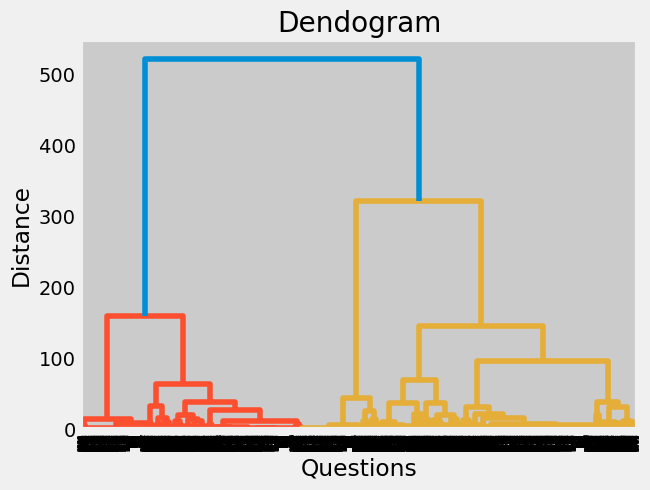

In [263]:
# dendogram
import scipy.cluster.hierarchy as hier
dendogram = hier.dendrogram(hier.linkage(X_pca, method='ward'))
plt.title('Dendogram')
plt.xlabel("Questions")
plt.ylabel("Distance")
plt.show()

In [267]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
y = model.fit_predict(X_pca)

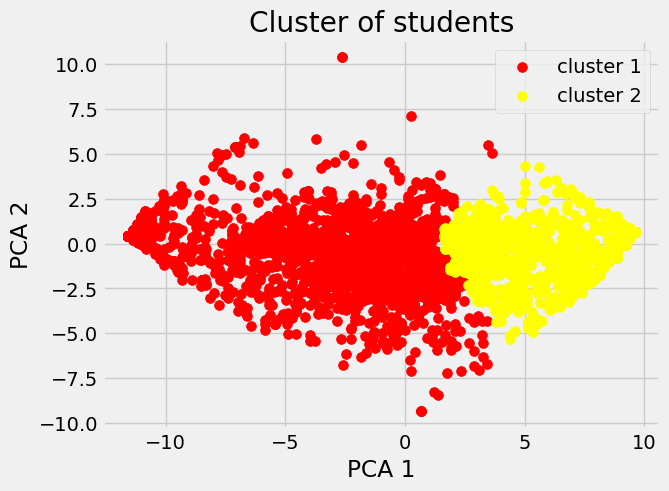

In [269]:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50, c='yellow', label='cluster 2')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [271]:
Counter(y)

Counter({0: 3502, 1: 2318})